In [28]:
#importing liabraries we need in our predectif model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn import metrics

In [31]:
#loading data
df = pd.read_csv("titanic-passengers.csv", encoding="ISO-8859-1", sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


exploring and cleaning the data

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
df['Age'].mean()

29.69911764705882

In [34]:
df['Age'].fillna(30, inplace=True)

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [37]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
D              3
              ..
C87            1
C103           1
C104           1
D19            1
E68            1
Name: Cabin, Length: 147, dtype: int64

In [41]:
df["Embarked"]=df['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [42]:
df['Sex']=df['Sex'].map({'male':0, 'female':1})
df['Survived']=df['Survived'].map({'No':0, 'Yes':1})

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,NaN,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,0
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,NaN,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,NaN,0
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,0


In [44]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [47]:
#Adding a new feature family size
df['Famsize']=df['SibSp']+df['Parch']+1

<AxesSubplot:xlabel='Famsize', ylabel='count'>

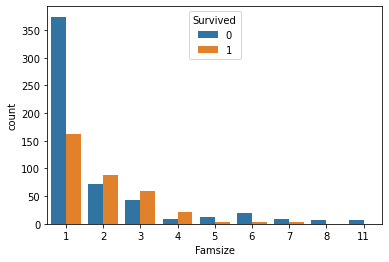

In [49]:
sns.countplot(x='Famsize', hue='Survived', data=df)


It seems that families have a higher chance of survival than singles. However too large families(over 5 members) have less chance to survive than small families.

 LOGISTIC REGRESSION

In [51]:
#features extraction
x=df[['Pclass','Sex', 'Age','Fare','Embarked','Famsize']]
y=df['Survived']

In [52]:
#Splitting the dataset with test size of 30%
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.30, random_state=40)

In [53]:
#build the logistic regression model
logreg=LogisticRegression()
#fitting the training data
logreg.fit(x_train, y_train)

LogisticRegression()

In [54]:
#Testing model's performance 
y_pred=logreg.predict(x_test)
print("Accuracy={:.2f}".format(logreg.score(x_test,y_test)))

Accuracy=0.81


Confusion matrix

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

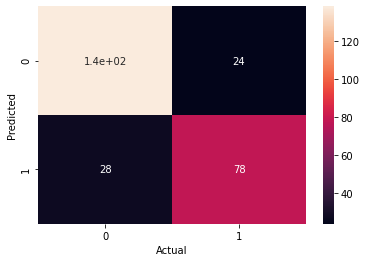

In [56]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Predicted'], colnames=['Actual'])
sns.heatmap(confusion_matrix, annot=True)

In [57]:
##Classification report
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       162
           1       0.76      0.74      0.75       106

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.80      0.81      0.81       268



3/Using the ROC/AUC validiation matrix

Explaining the ROC/AUC validation matrix for binary classification models
We use AUC (Area Under the Curve) of "Receiver Operator Characteristics" (ROC) to evaluate the accuracy of our logisitic regression model

What is an AUC-ROC curve?


The ROC curve is an evaluation metric for binary classification problems.

It is a probability curve that plots the True Positive Rate (TPR) against the False Negative Rate(FNR) at various threshold values and essentially separates the signal from the noise.

The AUC is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC 

When AUC=1 ==> the model distinguish perfectly between all posive and negative class points

When AUC=0 ==> the classifier would predict all positive oints as negeative and all negative points as positive 

When 0.5<AUC<1 the classifier is able to detect more numbers of true positives and true negatives then false positves and false negatives

When the AUC=0.5 ==> the model is not able to distinguish between positive and negative class points

In [58]:
#predict probabilities 
pred_prob=logreg.predict_proba(x_test)

In [59]:
from sklearn.metrics import roc_curve 
#Roc curve for the binary classifier 
fpr, tpr, thresh=roc_curve(y_test,pred_prob[:,1], pos_label=1)
#roc curve for fpr=tpr
random_probs=[0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [60]:
#computing the model roc_score to figure out its performance
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)

0.8670218961099464


In [62]:
#plot the roc curve
plt.style.use('seaborn')

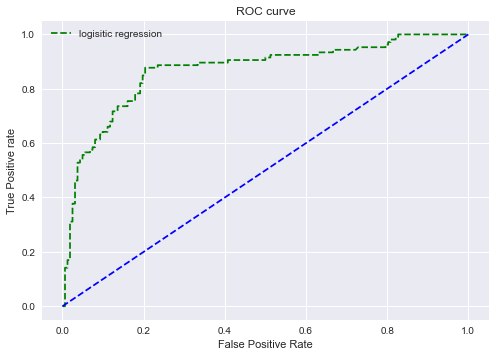

In [64]:
#plot roc curves 
plt.plot(fpr, tpr, linestyle='--', color='green', label='logisitic regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()
